<a href="https://colab.research.google.com/github/ibsa21/Police-brutality-DS-ML/blob/main/police_brutality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#introduction

    W -- White
    B -- Black
    H -- Hispanic
    A -- Asian
    O -- Other (Not specified in the database)
    N -- Native American


In [14]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import warnings
from typing import List
from wordcloud import WordCloud
%matplotlib inline
sb.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

In [15]:
def load_data(pd:pd, fileURL:str)->pd.DataFrame:
  '''Loads data'''
  return pd.read_csv(fileURL)

In [16]:
data = load_data(pd, 'database.csv')

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Data Cleaning

In [19]:
data = data.replace(
    {
        "race": {
            "W": "White",
            "B": "Black",
            "A": "Asian",
            "H": "Hispanic",
            "O": "Other",
            "N": "Native",
        }
    }
)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

The above output shows there are 2142 observations of 14 variables. <br>
There seems to be a decent amount of missing data in our set so we will want to work through cleaning up the data.

In [21]:
missing_data_counts = data.isnull().sum()
missing_data_counts

id                           0
name                        19
date                         0
manner_of_death              0
armed                        6
age                         43
gender                       1
race                       103
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        36
body_camera                  0
dtype: int64



The race column is the column with most data missing. In this case it's better to take out columns with missing data. These columns are, "race" "armed", "age", and "flee".


In [22]:
data = data.dropna(subset=['race', 'armed', 'age', 'flee']).reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    1986 non-null   int64  
 1   id                       1986 non-null   int64  
 2   name                     1986 non-null   object 
 3   date                     1986 non-null   object 
 4   manner_of_death          1986 non-null   object 
 5   armed                    1986 non-null   object 
 6   age                      1986 non-null   float64
 7   gender                   1986 non-null   object 
 8   race                     1986 non-null   object 
 9   city                     1986 non-null   object 
 10  state                    1986 non-null   object 
 11  signs_of_mental_illness  1986 non-null   bool   
 12  threat_level             1986 non-null   object 
 13  flee                     1986 non-null   object 
 14  body_camera             

The post cleaning dataset contains 1986 observations of 15 features.

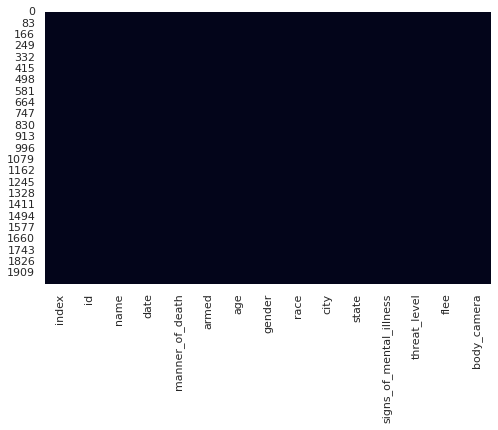

In [23]:
fig = plt.figure(figsize=(8,5))
sb.heatmap(data.isnull(), cbar=False)
plt.show()

In [24]:
data["date"] = pd.to_datetime(data["date"])

In [25]:
#date
earliest_date = data['date'].min()
latest_date = data['date'].max()
print(f'This dataset is recorded between {earliest_date} and {latest_date}.')

This dataset is recorded between 2015-01-02 00:00:00 and 2017-02-28 00:00:00.


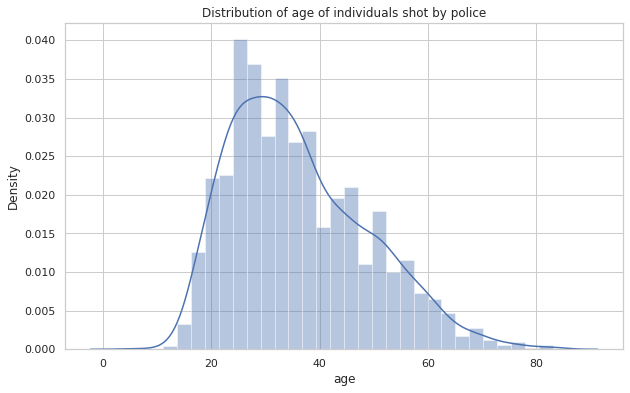

In [26]:
#distribution of ages
fig = plt.figure(figsize=(10,6))
sb.distplot(data['age'],bins=30)
plt.title('Distribution of age of individuals shot by police')
plt.show()

Observations:

    Most of the individuals shot and killed by police were between the ages of 20 and 40, with very few older than 80 or younger than 16. Though there are 20 children under the age of 16 that were killed by police.


In [27]:
def makePlot(plot_type:str, data:pd.DataFrame, \
                    feature:str, title:str = '', label:str = '', label2:str = '')->None:
    ax = None
    plt.figure(figsize=(6,5))
    if plot_type == 'boxplot':
        plt.boxplot(data =data , x = feature);
    else:
        ax = sb.countplot(data = data, x = feature)
    plt.xlabel(label2)
    plt.ylabel(label)
    plt.title(title)
    
    if ax is not None:
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
            x = p.get_x() + p.get_width() - 0.5
            y = p.get_height() + 0.1
            ax.annotate(percentage, (x, y))
    plt.show()

Insight: Approximately 64% were labeled 'attack,' 32% 'other', 4% 'undetermined'

##Race and Death (Overview of Deaths by Race)
This section focuses on the rate at which each race is being killed by police. 
This is more valuable information than just counting how many people from each race have been killed because we are able to weigh our information by comparing deaths by population.

### Visualizing number of people from each race killed by police in the two year span

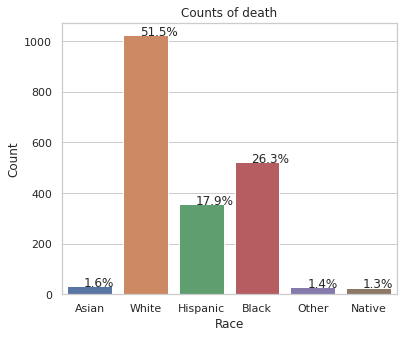

In [28]:
#relationship between certification and course counts
ylabel = 'Count'
xlabel = 'Race'
title = 'Counts of death'
makePlot('seaborn', data, 'race',title, ylabel, xlabel)

Whites, Blacks, and Hispanics are the three highest race deathrates in this dataset. But this high level analysis could suggest discrimnation, because there might be over-representation. In order to give fair analysis, I'll take information from Statista that will give me the population of each race in the United States for the year 2016. The link will be inserted below: https://www.statista.com/statistics/183489/population-of-the-us-by-ethnicity-since-2000/

In [29]:
demographics = [248410000, 42970000, 60570000, 18280000, 846000, 4050000]
population = pd.Series(demographics, index = ['W', 'B', 'H', 'A', 'O', 'N'])

In [30]:

death_rate_race = data['race'].value_counts()
unarmed_race = data[data.armed.str.contains('unarmed', na=False)]
unarmed_race_count = unarmed_race['race'].value_counts()

for race in population.index:
  if race not in death_rate_race:
    death_rate_race[race]  = 0
  if race not in unarmed_race_count:
    unarmed_race_count[race] = 0
    
proportion = {race:[death_rate_race[race]/population[race], unarmed_race_count[race]/population[race]] for race in population.index}
death_df = pd.DataFrame(data = proportion, index = ['death_race', 'unarmed_death_race'])
death_df

,W,B,H,A,O,N
death_race,0.0,0.0,0.0,0.0,0.0,0.0
unarmed_death_race,0.0,0.0,0.0,0.0,0.0,0.0


This means the rate at which Black people are being killed is 3 times higher than the white population and 2 times higher than the Hispanic population. From this analysis we can see that the rate of killings for Asia population is the lowest among all.

### Let's visualize the rate of killings for each race is population size is one Million

In [31]:
raceAndDeath = {'Race': population.index, 'deathsPerMillion' : [4,12,6,2,33,7], 'numberOfDeaths' : [1041,2981,1490,497, 1700, 1739]}
raceAndDeathDF = pd.DataFrame(raceAndDeath, columns=['Race', 'deathsPerMillion', 'numberOfDeaths'])
raceAndDeathDF

,Race,deathsPerMillion,numberOfDeaths
0,W,4,1041
1,B,12,2981
2,H,6,1490
3,A,2,497
4,O,33,1700
5,N,7,1739


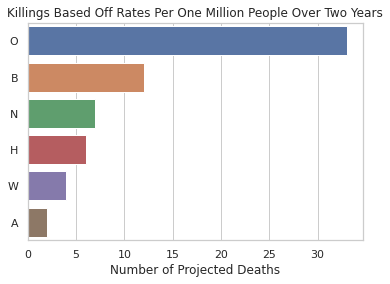

In [32]:
sb.set_color_codes("pastel")
x, y, sort_key = 'Race', 'deathsPerMillion', 'deathsPerMillion'
ax = sb.barplot(data=raceAndDeath, y=x, x=y, order= raceAndDeathDF.sort_values(sort_key, ascending=False).Race)
plt.xlabel("Number of Projected Deaths")
plt.title("Killings Based Off Rates Per One Million People Over Two Years")
plt.show()

## Analysis of Race Vs Age

In [33]:
data['age'].describe().round()

count    1986.0
mean       36.0
std        13.0
min         6.0
25%        26.0
50%        34.0
75%        45.0
max        83.0
Name: age, dtype: float64

Note: 95% of killings are aged 11-63

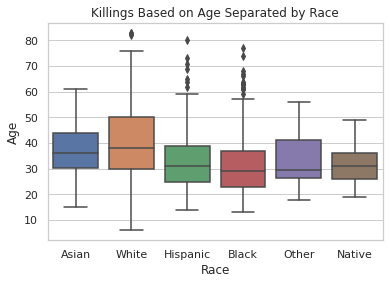

In [34]:
race_and_age = data.groupby('race')
sb.boxplot(x='race', y='age', data=data)

plt.xlabel("Race")
plt.ylabel("Age")
plt.title("Killings Based on Age Separated by Race")
plt.show()

From the above visualization we can see the mean age for each race. All of the races are consistently in there 30's and all of them being in the early 30's with the exception of the White population that had there mean centered around late 30's. From the graph it looks like the race with the most range of killings is the White population who looks to have the min and max values of our dataset. The Asian, Hispanic and Black population look very close together. The Native American population seems to have the least amount of range having the people killed by police being between late teens and late 40's.

## Unarmed Killings By Race

In [52]:
# Grouping the data by race and if they were armed or not
df_armed = data
df_armed["armed"] = data["armed"] != "unarmed"

race_armed = df_armed.groupby(["race", "armed"], as_index=False).index.count()
race_armed.sort_values(by=["armed", "index"], ascending=[False, False], inplace=True)
race_armed = race_armed.rename(columns={"index": "count"})
race_armed

,race,armed,count
10,White,True,962
2,Black,True,467
4,Hispanic,True,326
0,Asian,True,32
6,Native,True,24
8,Other,True,24
9,White,False,60
1,Black,False,56
3,Hispanic,False,29
7,Other,False,4


Since the racial composition of the United States is not equal, we will once again need to work with proportions

In [55]:
# Calculating the proportion of armed and unarmed police shootings
armed_race_proportion = (
    race_armed.pivot("race", "armed", "count")
    .apply(lambda x: x / x.sum(), axis=1)
    .sort_values(by=True)
    .dropna()
)
armed_race_proportion

armed,False,True
race,,
Other,0.142857,0.857143
Black,0.107075,0.892925
Hispanic,0.081690,0.918310
Native,0.076923,0.923077
White,0.058708,0.941292


We can already see, that the biggest proportion of armed victims are white, but let us plot the results, to have a better understanding of the scale

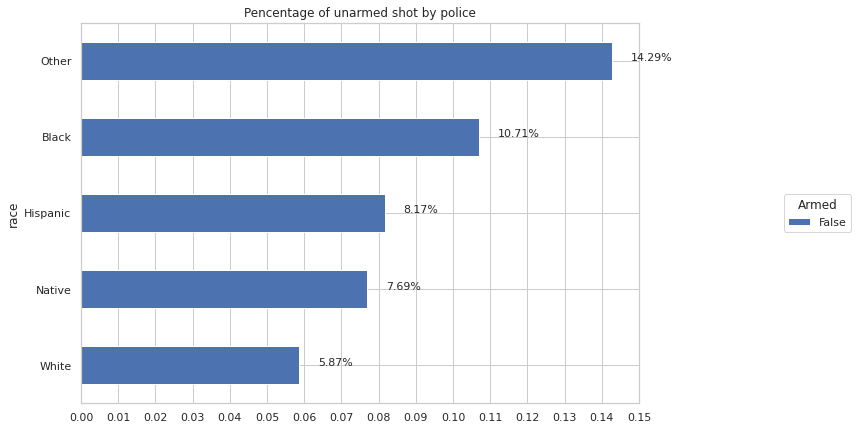

In [56]:
# Plotting the results
fig, ax = plt.subplots(figsize=(10, 7))
armed_race_proportion[False].plot(kind="barh", stacked=True, ax=ax) \
.legend(loc="center left", bbox_to_anchor=(1.25, 0.5), ncol=1, title="Armed")

plt.xticks(np.arange(0, np.max(armed_race_proportion[False]) + 0.01, 0.01))

for i in ax.patches:
    ax.text(
        i.get_width() + 0.005,
        i.get_y() + 0.25,
        str(round((i.get_width() * 100), 2)) + "%",
        fontsize=11,
    )
    
ax.invert_yaxis()
plt.title("Pencentage of unarmed shot by police")
plt.show()

After analysing this graph, we can see that only about 6% of white people were shot unarmed, white the rate for black people is almost double at about 11%. 

In [36]:
death_df.loc['unarmed_death_race']

W    0.0
B    0.0
H    0.0
A    0.0
O    0.0
N    0.0
Name: unarmed_death_race, dtype: float64

Gender and Death

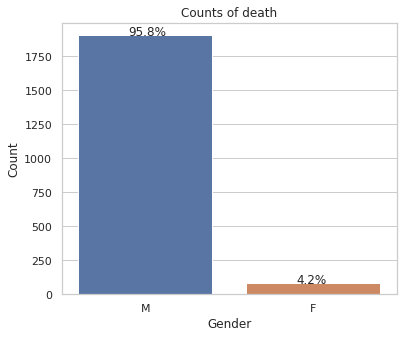

In [37]:
#relationship between death and gender
ylabel = 'Count'
xlabel = 'Gender'
title = 'Counts of death'
makePlot('seaborn', data, 'gender',title, ylabel, xlabel)

The analysis shows that out of 2142 peoples that were killed in this dataset 95.8% of them were males compared to 4.2% of females.


## Not Fleeing Suspects Killed by Race

In [38]:
# fleeing = data['flee'].describe()
# types_fleeing = data['flee'].unique()
# print(fleeing, types_fleeing)
# data.groupby('flee').value_counts()

## Threat Level and Races

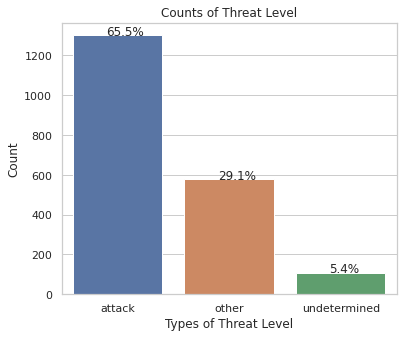

In [39]:
#relationship between certification and course counts
ylabel = 'Count'
xlabel = 'Types of Threat Level'
title = 'Counts of Threat Level'
makePlot('seaborn', data, 'threat_level',title, ylabel, xlabel)

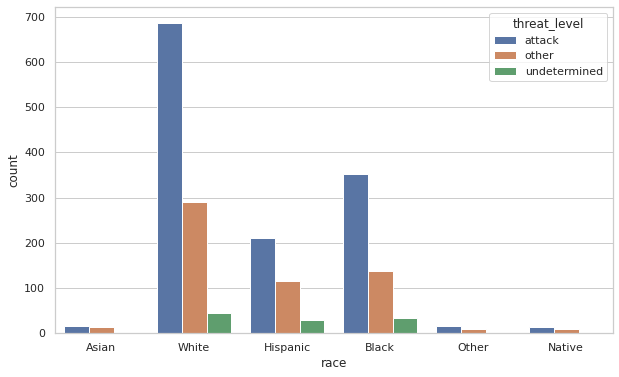

In [40]:
fig = plt.figure(figsize=(10,6))
sb.countplot(x='race', data=data, hue='threat_level')
plt.show()

### Threat Levels and Body Camera

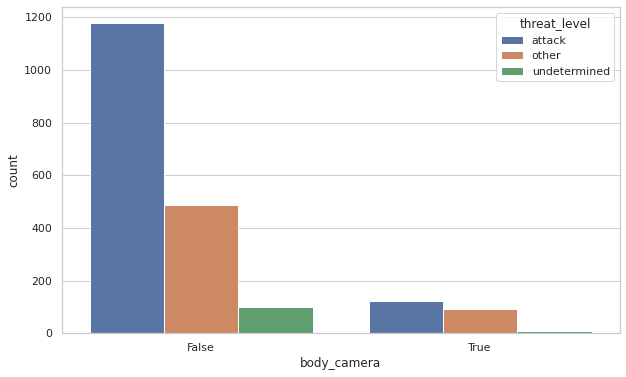

In [41]:
fig = plt.figure(figsize=(10,6))
sb.countplot(x='body_camera', data=data, hue='threat_level')
plt.show()

In [42]:
#number of attacks when camera is present
attack_camera_present = data[(data['body_camera']==True) & (data['threat_level']=='attack')].shape[0]
total_camera_present = data[(data['body_camera']==True)].shape[0]

attack_no_camera = data[(data['body_camera']==False) & (data['threat_level']=='attack')].shape[0]
total_camera_absent = data[(data['body_camera']==False)].shape[0]

print('Percentage of attack when there is a camera:', round(attack_camera_present/total_camera_present, 4) * 100)
print('Percentage of attack when there is no camera:', round(attack_no_camera/total_camera_absent, 4) * 100)
print('Attacks, Camera present vs not present:', round(attack_camera_present/(attack_camera_present+attack_no_camera),2)*100)

Percentage of attack when there is a camera: 54.75
Percentage of attack when there is no camera: 66.8
Attacks, Camera present vs not present: 9.0


We see that there seems to be a problem with body camera footage when there is an 'attack' level threat, or really when there is a killing in general.
However, the proportion of 'attack' threat levels that were not recorded make up 65% of deaths, while the proportion of recorded deaths that were labeled 'attack' threat level was closer to 60%. This could be a policy issue.

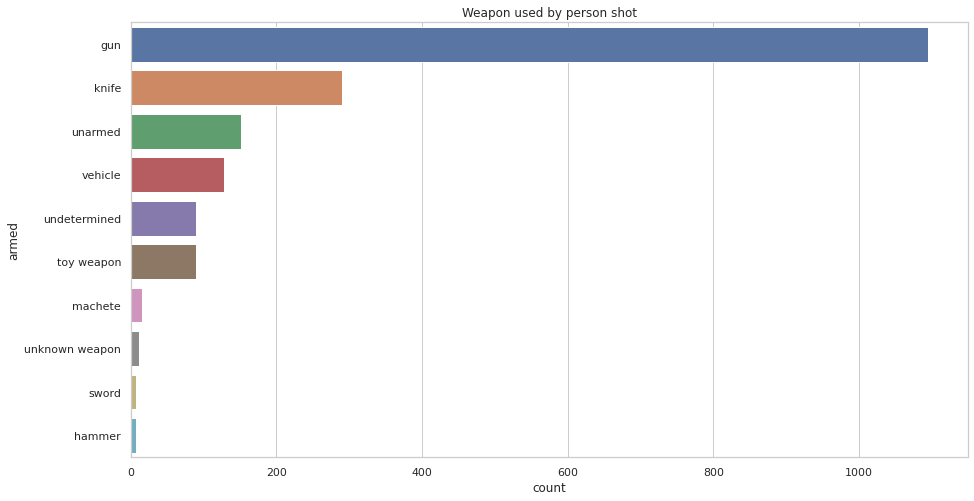

In [43]:
# Plot the 10 most common weapons used by individuals shot
plt.figure(figsize=(15, 8))
ax = sb.countplot(y='armed', data=data, order = data.armed.value_counts().iloc[:10].index)
plt.title('Weapon used by person shot')
plt.show()

Observations:

    Most of victims had a Gun or a Knife at time of incident
    An alarmingly high proportion of individuals shot by police were either Unarmed or Armed with a Toy Weapon


## Killings and State

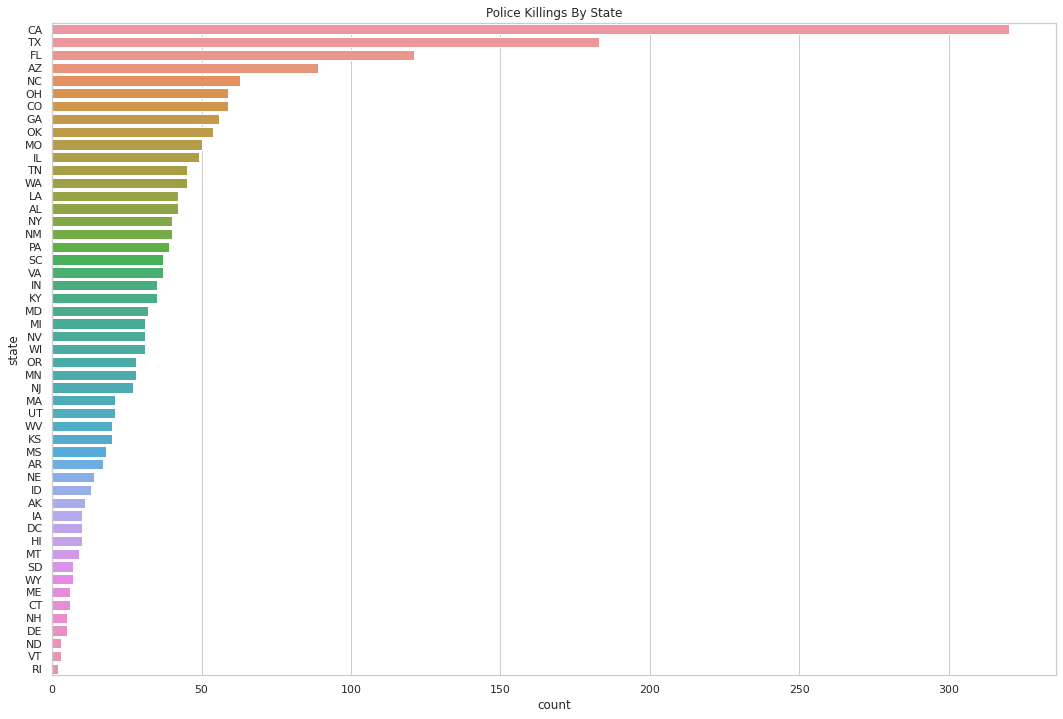

In [44]:
plt.figure(figsize=(18, 12))
sb.countplot(y="state", data=data,order=data.state.value_counts().index)
plt.title('Police Killings By State')
plt.show()

Observation:

    California is the state with the Highest Number of Killings followed by Texas, Florida, Arizona, and so on


## Shooting Frequency Over Times

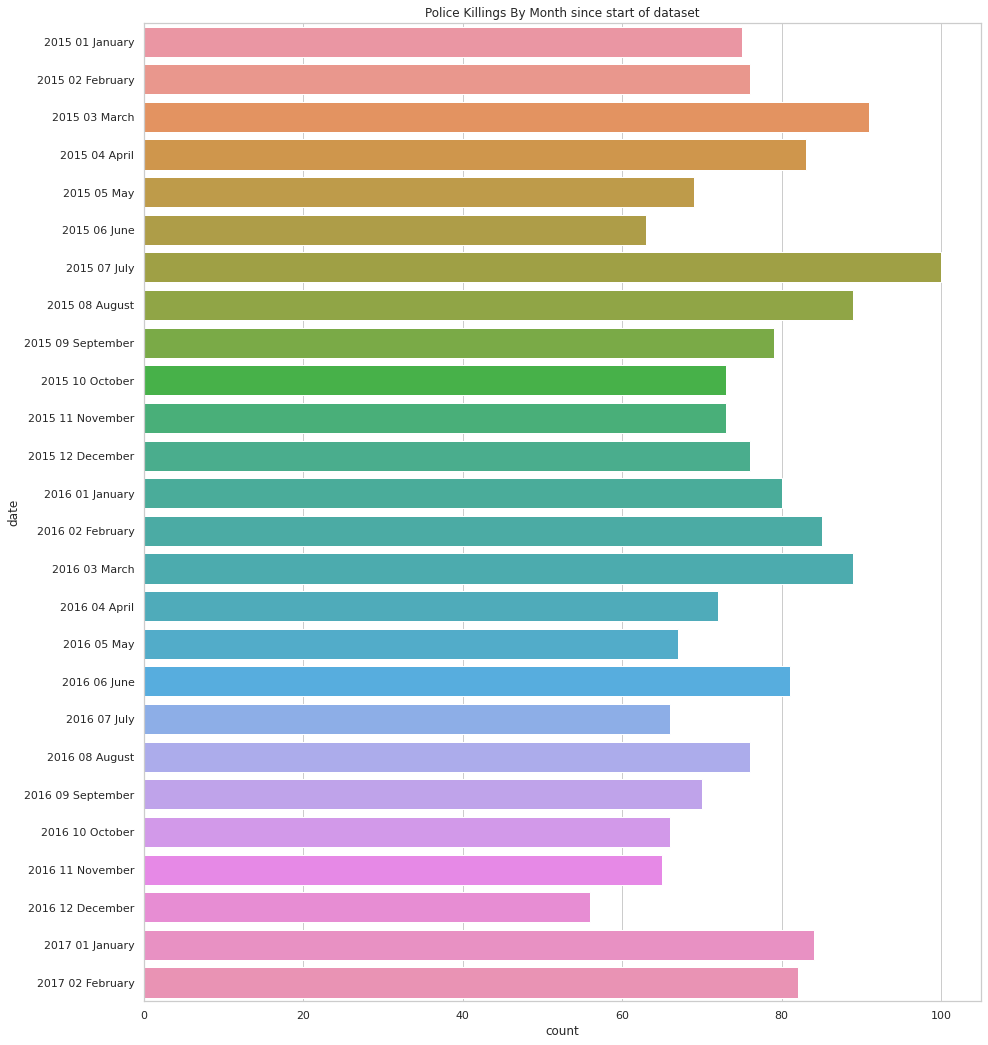

In [45]:
# Convert date from object to datetime
data.date = pd.to_datetime(data.date)
plt.figure(figsize=(15,18))
sb.countplot(y=data.date.dt.strftime('%Y %m %B'), order=sorted(data.date.dt.strftime('%Y %m %B').unique()))
plt.title('Police Killings By Month since start of dataset')
plt.show()

## Mental Illness and Police Shooting
Since we have the data, I would like to begin by exploring the data on mental ilness and shootings. I want to know where the mentally ill are shot most frequently

In [46]:
data.head()

,index,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False


In [47]:
# Grouping the data by state and if there are signs of mental ilness
mental_ilness = data.groupby(["state", "signs_of_mental_illness"], as_index=False).index.count()
mental_ilness.sort_values(by=["signs_of_mental_illness", "index"], ascending=[False, False], inplace=True)
mental_ilness = mental_ilness.rename(columns={"index": "count"})
mental_ilness

,state,signs_of_mental_illness,count
9,CA,True,76
84,TX,True,45
19,FL,True,34
7,AZ,True,25
92,WA,True,19
...,...,...,...
16,DE,False,4
79,SD,False,4
56,ND,False,3
76,RI,False,2


In [48]:
# Filter cases where signs of mental ilness were present
mental_ill_victim = (
    mental_ilness[mental_ilness["signs_of_mental_illness"] == True]
    .drop("signs_of_mental_illness", axis=1)
    .reset_index(drop=True)
)
mental_ill_victim

,state,count
0,CA,76
1,TX,45
2,FL,34
3,AZ,25
4,WA,19
5,NC,16
6,NY,16
7,OK,14
8,VA,14
9,GA,12


## Visualization of Fatal Shootings and State

In [49]:
# Interactive map of the USA to visualise shootings where signs of mental illness were present
fig = px.choropleth(
    mental_ill_victim,
    locations="state",
    color="count",
    hover_name="state",
    locationmode="USA-states",
)
fig.update_layout(
    title_text="Fatal shootings of people with signs of mental illness in each state",
    geo_scope="usa",
)
fig.show()

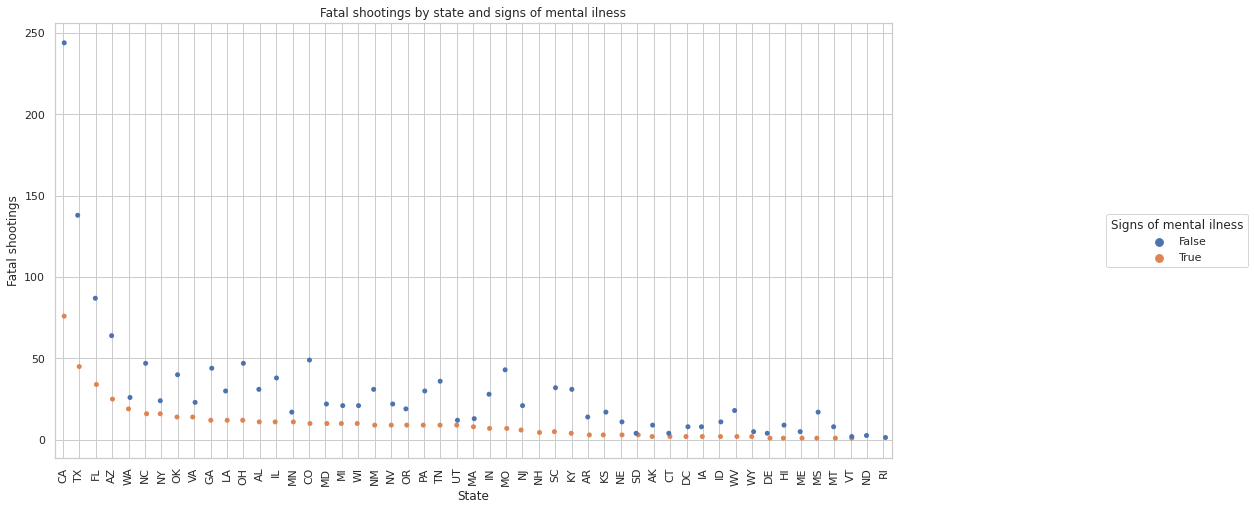

In [50]:
# Plotting the data
fig, ax = plt.subplots(figsize=(15, 8))
sb.stripplot(
    ax=ax, data=mental_ilness, x="state", y="count", hue="signs_of_mental_illness"
).legend(
    loc="center left",
    bbox_to_anchor=(1.25, 0.5),
    ncol=1,
    title="Signs of mental ilness",
)
plt.xticks(rotation=90)
ax.xaxis.grid(True)
plt.ylabel("Fatal shootings")
plt.xlabel("State")
plt.title("Fatal shootings by state and signs of mental ilness")
plt.show()

We can see that California has by far the most fatal shootings by the police